In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(683.5285)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 661.11735  validloss 1176.25334±0.00000  bestvalidloss 1176.25334  last_update 0
train: iter 1  trainloss 492.67120  validloss 986.58052±0.00000  bestvalidloss 986.58052  last_update 0
train: iter 2  trainloss 140.10912  validloss 533.37576±0.00000  bestvalidloss 533.37576  last_update 0
train: iter 3  trainloss -98.10119  validloss 86.46772±0.00000  bestvalidloss 86.46772  last_update 0
train: iter 4  trainloss -326.71377  validloss 98.71876±0.00000  bestvalidloss 86.46772  last_update 1
train: iter 5  trainloss -468.95326  validloss -153.89933±0.00000  bestvalidloss -153.89933  last_update 0
train: iter 6  trainloss -632.79355  validloss -362.88025±0.00000  bestvalidloss -362.88025  last_update 0
train: iter 7  trainloss -673.38875  validloss -276.63409±0.00000  bestvalidloss -362.88025  last_update 1
train: iter 8  trainloss -786.23486  validloss -434.47115±0.00000  bestvalidloss -434.47115  last_update 0
train: iter 9  trainloss -858.1221

train: iter 75  trainloss -1627.31532  validloss -1330.57516±0.00000  bestvalidloss -1454.49835  last_update 4
train: iter 76  trainloss -1620.89842  validloss -1357.03555±0.00000  bestvalidloss -1454.49835  last_update 5
train: iter 77  trainloss -1645.48087  validloss -1215.83647±0.00000  bestvalidloss -1454.49835  last_update 6
train: iter 78  trainloss -1635.64562  validloss -938.25897±0.00000  bestvalidloss -1454.49835  last_update 7
train: iter 79  trainloss -1640.19973  validloss -903.51714±0.00000  bestvalidloss -1454.49835  last_update 8
train: iter 80  trainloss -1657.72112  validloss -1465.30017±0.00000  bestvalidloss -1465.30017  last_update 0
train: iter 81  trainloss -1492.33970  validloss -1350.39774±0.00000  bestvalidloss -1465.30017  last_update 1
train: iter 82  trainloss -1620.74426  validloss -1385.20545±0.00000  bestvalidloss -1465.30017  last_update 2
train: iter 83  trainloss -1699.04553  validloss -1306.55121±0.00000  bestvalidloss -1465.30017  last_update 3
tra

train: iter 149  trainloss -1841.12173  validloss -1514.68565±0.00000  bestvalidloss -1631.77444  last_update 4
train: iter 150  trainloss -1802.17387  validloss -1657.83782±0.00000  bestvalidloss -1657.83782  last_update 0
train: iter 151  trainloss -1579.41901  validloss -1374.40238±0.00000  bestvalidloss -1657.83782  last_update 1
train: iter 152  trainloss -1749.37702  validloss -1427.94506±0.00000  bestvalidloss -1657.83782  last_update 2
train: iter 153  trainloss -1822.61634  validloss -1461.78565±0.00000  bestvalidloss -1657.83782  last_update 3
train: iter 154  trainloss -1827.17259  validloss -1353.36670±0.00000  bestvalidloss -1657.83782  last_update 4
train: iter 155  trainloss -1818.13856  validloss -1309.48833±0.00000  bestvalidloss -1657.83782  last_update 5
train: iter 156  trainloss -1849.87679  validloss -1462.24868±0.00000  bestvalidloss -1657.83782  last_update 6
train: iter 157  trainloss -1831.22060  validloss -1634.77273±0.00000  bestvalidloss -1657.83782  last_u

train: iter 223  trainloss -1997.56481  validloss -1849.24381±0.00000  bestvalidloss -1849.24381  last_update 0
train: iter 224  trainloss -1962.41766  validloss -1838.25537±0.00000  bestvalidloss -1849.24381  last_update 1
train: iter 225  trainloss -1921.69079  validloss -1418.13650±0.00000  bestvalidloss -1849.24381  last_update 2
train: iter 226  trainloss -1963.52709  validloss -1647.64477±0.00000  bestvalidloss -1849.24381  last_update 3
train: iter 227  trainloss -2016.52157  validloss -1830.63081±0.00000  bestvalidloss -1849.24381  last_update 4
train: iter 228  trainloss -1959.73585  validloss -1664.82786±0.00000  bestvalidloss -1849.24381  last_update 5
train: iter 229  trainloss -1956.48719  validloss -1772.47718±0.00000  bestvalidloss -1849.24381  last_update 6
train: iter 230  trainloss -1960.40779  validloss -1766.24534±0.00000  bestvalidloss -1849.24381  last_update 7
train: iter 231  trainloss -1961.70527  validloss -1798.86118±0.00000  bestvalidloss -1849.24381  last_u

train: iter 296  trainloss -1992.81697  validloss -1817.95141±0.00000  bestvalidloss -1898.93976  last_update 4
train: iter 297  trainloss -2030.89496  validloss -1757.60415±0.00000  bestvalidloss -1898.93976  last_update 5
train: iter 298  trainloss -1991.66522  validloss -1800.55524±0.00000  bestvalidloss -1898.93976  last_update 6
train: iter 299  trainloss -1848.83793  validloss -1777.97381±0.00000  bestvalidloss -1898.93976  last_update 7
train: iter 300  trainloss -1687.03840  validloss -1779.58898±0.00000  bestvalidloss -1898.93976  last_update 8
train: iter 301  trainloss -1965.23985  validloss -1732.53917±0.00000  bestvalidloss -1898.93976  last_update 9
train: iter 302  trainloss -2029.59439  validloss -1866.78773±0.00000  bestvalidloss -1898.93976  last_update 10
train: iter 303  trainloss -2048.32202  validloss -1880.25254±0.00000  bestvalidloss -1898.93976  last_update 11
train: iter 304  trainloss -2015.17623  validloss -1904.52935±0.00000  bestvalidloss -1904.52935  last

train: iter 369  trainloss -2076.26895  validloss -1904.95054±0.00000  bestvalidloss -1928.32241  last_update 12
train: iter 370  trainloss -2068.22281  validloss -1863.97224±0.00000  bestvalidloss -1928.32241  last_update 13
train: iter 371  trainloss -2010.23672  validloss -1810.95737±0.00000  bestvalidloss -1928.32241  last_update 14
train: iter 372  trainloss -1800.03135  validloss -1639.54500±0.00000  bestvalidloss -1928.32241  last_update 15
train: iter 373  trainloss -2041.67771  validloss -1871.51269±0.00000  bestvalidloss -1928.32241  last_update 16
train: iter 374  trainloss -2019.74283  validloss -1622.87045±0.00000  bestvalidloss -1928.32241  last_update 17
train: iter 375  trainloss -2067.36070  validloss -1823.01116±0.00000  bestvalidloss -1928.32241  last_update 18
train: iter 376  trainloss -2069.33058  validloss -1886.90996±0.00000  bestvalidloss -1928.32241  last_update 19
train: iter 377  trainloss -2060.57697  validloss -1785.50277±0.00000  bestvalidloss -1928.32241

train: iter 442  trainloss -2069.04645  validloss -1880.75591±0.00000  bestvalidloss -1960.41571  last_update 49
train: iter 443  trainloss -1936.73132  validloss -1874.94133±0.00000  bestvalidloss -1960.41571  last_update 50
train: iter 444  trainloss -2085.70719  validloss -1846.08837±0.00000  bestvalidloss -1960.41571  last_update 51
train: iter 445  trainloss -2080.48089  validloss -1909.64063±0.00000  bestvalidloss -1960.41571  last_update 52
train: iter 446  trainloss -2075.24453  validloss -1928.15599±0.00000  bestvalidloss -1960.41571  last_update 53
train: iter 447  trainloss -2090.39225  validloss -1959.98066±0.00000  bestvalidloss -1960.41571  last_update 54
train: iter 448  trainloss -2066.41437  validloss -1899.00661±0.00000  bestvalidloss -1960.41571  last_update 55
train: iter 449  trainloss -2008.50606  validloss -1631.27892±0.00000  bestvalidloss -1960.41571  last_update 56
train: iter 450  trainloss -2090.22281  validloss -1798.97931±0.00000  bestvalidloss -1960.41571

train: iter 515  trainloss -2098.01824  validloss -1875.41079±0.00000  bestvalidloss -1984.96304  last_update 56
train: iter 516  trainloss -2106.61452  validloss -1937.29428±0.00000  bestvalidloss -1984.96304  last_update 57
train: iter 517  trainloss -2111.05630  validloss -1884.61833±0.00000  bestvalidloss -1984.96304  last_update 58
train: iter 518  trainloss -2023.74478  validloss -1909.29207±0.00000  bestvalidloss -1984.96304  last_update 59
train: iter 519  trainloss -2075.51257  validloss -1754.97143±0.00000  bestvalidloss -1984.96304  last_update 60
train: iter 520  trainloss -2113.74665  validloss -1823.29386±0.00000  bestvalidloss -1984.96304  last_update 61
train: iter 521  trainloss -2104.14853  validloss -1970.90305±0.00000  bestvalidloss -1984.96304  last_update 62
train: iter 522  trainloss -2044.21615  validloss -1468.98795±0.00000  bestvalidloss -1984.96304  last_update 63
train: iter 523  trainloss -2043.51295  validloss -1777.82551±0.00000  bestvalidloss -1984.96304

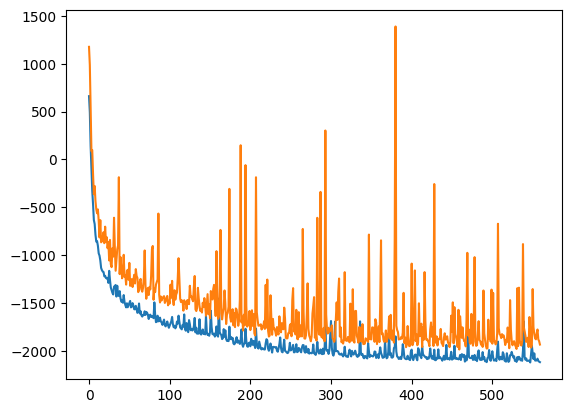

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.08848  validloss 9.14897±0.00000  bestvalidloss 9.14897  last_update 0
train: iter 1  trainloss 8.29356  validloss 8.31456±0.00000  bestvalidloss 8.31456  last_update 0
train: iter 2  trainloss 7.63790  validloss 7.66182±0.00000  bestvalidloss 7.66182  last_update 0
train: iter 3  trainloss 7.08375  validloss 7.07459±0.00000  bestvalidloss 7.07459  last_update 0
train: iter 4  trainloss 6.61835  validloss 6.59894±0.00000  bestvalidloss 6.59894  last_update 0
train: iter 5  trainloss 6.22557  validloss 6.18403±0.00000  bestvalidloss 6.18403  last_update 0
train: iter 6  trainloss 5.88218  validloss 5.83783±0.00000  bestvalidloss 5.83783  last_update 0
train: iter 7  trainloss 5.58611  validloss 5.52496±0.00000  bestvalidloss 5.52496  last_update 0
train: iter 8  trainloss 5.31641  validloss 5.24628±0.00000  bestvalidloss 5.24628  last_update 0
train: iter 9  trainloss 5.08695  validloss 5.01373±0.00000  bestvalidloss 5.01373  last_update 0
train: iter 10  trai

train: iter 84  trainloss -1.14073  validloss -0.57168±0.00000  bestvalidloss -0.67034  last_update 1
train: iter 85  trainloss -1.25270  validloss -0.38318±0.00000  bestvalidloss -0.67034  last_update 2
train: iter 86  trainloss -1.28824  validloss -0.47657±0.00000  bestvalidloss -0.67034  last_update 3
train: iter 87  trainloss -1.24903  validloss -0.67995±0.00000  bestvalidloss -0.67995  last_update 0
train: iter 88  trainloss -1.29040  validloss -0.64368±0.00000  bestvalidloss -0.67995  last_update 1
train: iter 89  trainloss -1.27145  validloss -0.74451±0.00000  bestvalidloss -0.74451  last_update 0
train: iter 90  trainloss -1.31415  validloss -0.67460±0.00000  bestvalidloss -0.74451  last_update 1
train: iter 91  trainloss -1.31530  validloss -0.51347±0.00000  bestvalidloss -0.74451  last_update 2
train: iter 92  trainloss -1.47462  validloss -0.31161±0.00000  bestvalidloss -0.74451  last_update 3
train: iter 93  trainloss -1.35753  validloss -0.87718±0.00000  bestvalidloss -0.8

train: iter 172  trainloss -1.65831  validloss 0.09640±0.00000  bestvalidloss -0.87718  last_update 79
train: iter 173  trainloss -1.89466  validloss -0.16179±0.00000  bestvalidloss -0.87718  last_update 80
train: iter 174  trainloss -1.74781  validloss 0.13283±0.00000  bestvalidloss -0.87718  last_update 81
train: iter 175  trainloss -1.73588  validloss 0.09721±0.00000  bestvalidloss -0.87718  last_update 82
train: iter 176  trainloss -1.95863  validloss -0.35390±0.00000  bestvalidloss -0.87718  last_update 83
train: iter 177  trainloss -1.87287  validloss -0.04893±0.00000  bestvalidloss -0.87718  last_update 84
train: iter 178  trainloss -1.87950  validloss 0.36877±0.00000  bestvalidloss -0.87718  last_update 85
train: iter 179  trainloss -1.95939  validloss -0.02871±0.00000  bestvalidloss -0.87718  last_update 86
train: iter 180  trainloss -1.96073  validloss 0.26835±0.00000  bestvalidloss -0.87718  last_update 87
train: iter 181  trainloss -1.91494  validloss -0.39461±0.00000  best

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.7301, -3.5216, -5.0672, -2.1888], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 103.29135  validloss 106.14939±0.00000  bestvalidloss 106.14939  last_update 0
train: iter 1  trainloss 75.27395  validloss 82.76942±0.00000  bestvalidloss 82.76942  last_update 0
train: iter 2  trainloss 55.55624  validloss 58.84644±0.00000  bestvalidloss 58.84644  last_update 0
train: iter 3  trainloss 43.62379  validloss 45.76739±0.00000  bestvalidloss 45.76739  last_update 0
train: iter 4  trainloss 35.08849  validloss 36.73812±0.00000  bestvalidloss 36.73812  last_update 0
train: iter 5  trainloss 28.27609  validloss 29.91934±0.00000  bestvalidloss 29.91934  last_update 0
train: iter 6  trainloss 22.75278  validloss 24.63132±0.00000  bestvalidloss 24.63132  last_update 0
train: iter 7  trainloss 18.37703  validloss 20.41179±0.00000  bestvalidloss 20.41179  last_update 0
train: iter 8  trainloss 14.79016  validloss 17.01852±0.00000  bestvalidloss 17.01852  last_update 0
train: iter 9  trainloss 11.93684  validloss 14.58866±0.00000  bestvalidloss 14.58866  l

train: iter 83  trainloss 1.44631  validloss 3.78268±0.00000  bestvalidloss 3.61956  last_update 1
train: iter 84  trainloss 1.41156  validloss 3.82546±0.00000  bestvalidloss 3.61956  last_update 2
train: iter 85  trainloss 1.43368  validloss 3.67372±0.00000  bestvalidloss 3.61956  last_update 3
train: iter 86  trainloss 1.45882  validloss 3.96310±0.00000  bestvalidloss 3.61956  last_update 4
train: iter 87  trainloss 1.46444  validloss 3.75628±0.00000  bestvalidloss 3.61956  last_update 5
train: iter 88  trainloss 1.45391  validloss 3.55483±0.00000  bestvalidloss 3.55483  last_update 0
train: iter 89  trainloss 1.41148  validloss 3.61378±0.00000  bestvalidloss 3.55483  last_update 1
train: iter 90  trainloss 1.43845  validloss 3.58646±0.00000  bestvalidloss 3.55483  last_update 2
train: iter 91  trainloss 1.42723  validloss 3.70363±0.00000  bestvalidloss 3.55483  last_update 3
train: iter 92  trainloss 1.41578  validloss 3.81668±0.00000  bestvalidloss 3.55483  last_update 4
train: ite

train: iter 165  trainloss 1.43348  validloss 3.77810±0.00000  bestvalidloss 3.52470  last_update 62
train: iter 166  trainloss 1.39329  validloss 3.71983±0.00000  bestvalidloss 3.52470  last_update 63
train: iter 167  trainloss 1.36100  validloss 3.65167±0.00000  bestvalidloss 3.52470  last_update 64
train: iter 168  trainloss 1.39975  validloss 3.77989±0.00000  bestvalidloss 3.52470  last_update 65
train: iter 169  trainloss 1.39745  validloss 3.81026±0.00000  bestvalidloss 3.52470  last_update 66
train: iter 170  trainloss 1.37336  validloss 3.78158±0.00000  bestvalidloss 3.52470  last_update 67
train: iter 171  trainloss 1.40808  validloss 3.55251±0.00000  bestvalidloss 3.52470  last_update 68
train: iter 172  trainloss 1.44139  validloss 3.77108±0.00000  bestvalidloss 3.52470  last_update 69
train: iter 173  trainloss 1.40621  validloss 3.60606±0.00000  bestvalidloss 3.52470  last_update 70
train: iter 174  trainloss 1.42289  validloss 3.78808±0.00000  bestvalidloss 3.52470  last_

train: iter 248  trainloss 1.40935  validloss 3.75892±0.00000  bestvalidloss 3.48610  last_update 6
train: iter 249  trainloss 1.41542  validloss 3.61329±0.00000  bestvalidloss 3.48610  last_update 7
train: iter 250  trainloss 1.38250  validloss 3.74075±0.00000  bestvalidloss 3.48610  last_update 8
train: iter 251  trainloss 1.40463  validloss 3.69343±0.00000  bestvalidloss 3.48610  last_update 9
train: iter 252  trainloss 1.41436  validloss 3.57785±0.00000  bestvalidloss 3.48610  last_update 10
train: iter 253  trainloss 1.41699  validloss 3.70159±0.00000  bestvalidloss 3.48610  last_update 11
train: iter 254  trainloss 1.38019  validloss 3.61346±0.00000  bestvalidloss 3.48610  last_update 12
train: iter 255  trainloss 1.38741  validloss 3.52999±0.00000  bestvalidloss 3.48610  last_update 13
train: iter 256  trainloss 1.43864  validloss 3.68192±0.00000  bestvalidloss 3.48610  last_update 14
train: iter 257  trainloss 1.38901  validloss 3.63369±0.00000  bestvalidloss 3.48610  last_upda

train: iter 330  trainloss 1.41231  validloss 3.65369±0.00000  bestvalidloss 3.43971  last_update 37
train: iter 331  trainloss 1.41667  validloss 3.47497±0.00000  bestvalidloss 3.43971  last_update 38
train: iter 332  trainloss 1.39062  validloss 3.38760±0.00000  bestvalidloss 3.38760  last_update 0
train: iter 333  trainloss 1.39844  validloss 3.67337±0.00000  bestvalidloss 3.38760  last_update 1
train: iter 334  trainloss 1.36451  validloss 3.77336±0.00000  bestvalidloss 3.38760  last_update 2
train: iter 335  trainloss 1.39889  validloss 3.58080±0.00000  bestvalidloss 3.38760  last_update 3
train: iter 336  trainloss 1.44122  validloss 3.72679±0.00000  bestvalidloss 3.38760  last_update 4
train: iter 337  trainloss 1.38323  validloss 3.67171±0.00000  bestvalidloss 3.38760  last_update 5
train: iter 338  trainloss 1.38340  validloss 3.70369±0.00000  bestvalidloss 3.38760  last_update 6
train: iter 339  trainloss 1.37810  validloss 3.59462±0.00000  bestvalidloss 3.38760  last_update 

train: iter 413  trainloss 1.33710  validloss 3.53992±0.00000  bestvalidloss 3.38760  last_update 81
train: iter 414  trainloss 1.39375  validloss 3.79813±0.00000  bestvalidloss 3.38760  last_update 82
train: iter 415  trainloss 1.38527  validloss 3.61295±0.00000  bestvalidloss 3.38760  last_update 83
train: iter 416  trainloss 1.38275  validloss 3.71458±0.00000  bestvalidloss 3.38760  last_update 84
train: iter 417  trainloss 1.37910  validloss 3.77391±0.00000  bestvalidloss 3.38760  last_update 85
train: iter 418  trainloss 1.35041  validloss 3.67976±0.00000  bestvalidloss 3.38760  last_update 86
train: iter 419  trainloss 1.37076  validloss 3.53004±0.00000  bestvalidloss 3.38760  last_update 87
train: iter 420  trainloss 1.33641  validloss 3.57332±0.00000  bestvalidloss 3.38760  last_update 88
train: iter 421  trainloss 1.42763  validloss 3.65707±0.00000  bestvalidloss 3.38760  last_update 89
train: iter 422  trainloss 1.35669  validloss 3.60434±0.00000  bestvalidloss 3.38760  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.5076)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(2.6375)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.2486510945220133
tensor([2.6833])
